Three-Dimensional Plotting in Matplotlib


Ban đầu Matplotlib được thiết kế chỉ với mục đích vẽ biểu đồ hai chiều. Vào khoảng thời gian phát hành phiên bản 1.0, một số tiện ích vẽ biểu đồ ba chiều đã được xây dựng trên màn hình hai chiều của Matplotlib và kết quả là một bộ công cụ thuận tiện (nếu hơi hạn chế) để trực quan hóa dữ liệu ba chiều. đồ thị ba chiều được kích hoạt bằng cách nhập bộ công cụ mplot3d, đi kèm với cài đặt Matplotlib chính:

In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [8]:
from mpl_toolkits import mplot3d
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

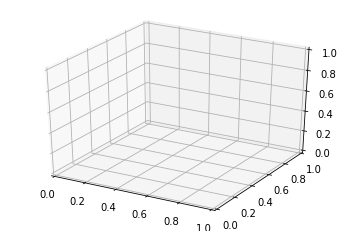

In [3]:
fig = plt.figure()
ax = plt.axes(projection='3d')

Three-dimensional Points and Lines


Với các trục ba chiều này được kích hoạt, giờ đây chúng ta có thể vẽ nhiều loại biểu đồ ba chiều khác nhau. Vẽ đồ thị ba chiều là một trong những chức năng mang lại lợi ích to lớn từ việc xem các số liệu một cách tương tác thay vì tĩnh trong sổ ghi chép;

Biểu đồ ba chiều cơ bản nhất là một đường hoặc tập hợp các biểu đồ phân tán được tạo từ các bộ (x, y, z) bộ ba. Tương tự với các biểu đồ hai chiều phổ biến hơn đã thảo luận trước đó, chúng có thể được tạo bằng cách sử dụng các hàm ax.plot3D và ax.scatter3D. 

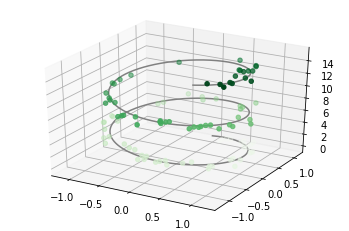

In [4]:
ax = plt.axes(projection='3d')

# Data for a three-dimensional line
zline = np.linspace(0, 15, 1000)
xline = np.sin(zline)
yline = np.cos(zline)
ax.plot3D(xline, yline, zline, 'gray')

# Data for three-dimensional scattered points
zdata = 15 * np.random.random(100)
xdata = np.sin(zdata) + 0.1 * np.random.randn(100)
ydata = np.cos(zdata) + 0.1 * np.random.randn(100)
ax.scatter3D(xdata, ydata, zdata, c=zdata, cmap='Greens');

Three-dimensional Contour Plots
Lô đường viền ba chiều

Tương tự như các đồ thị đường viền mà chúng tôi đã khám phá trong Đồ thị Mật độ và Đồ thị Đường viền, mplot3d chứa các công cụ để tạo các đồ thị phù điêu ba chiều bằng cách sử dụng các đầu vào giống nhau. Giống như biểu đồ ax.contour hai chiều, ax.contour3D yêu cầu tất cả dữ liệu đầu vào phải ở dạng lưới thông thường hai chiều, với dữ liệu Z được đánh giá tại mỗi điểm. Ở đây, chúng tôi sẽ hiển thị một biểu đồ đường bao ba chiều của một hàm hình sin ba chiều:

/usr/local/lib/python3.7/dist-packages/mpl_toolkits/mplot3d/art3d.py:304: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  self._segments3d = np.asanyarray(segments)


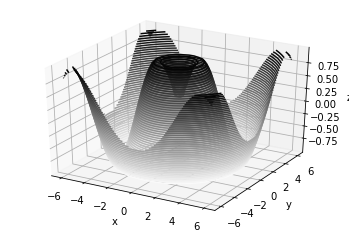

In [5]:
def f(x, y):
    return np.sin(np.sqrt(x ** 2 + y ** 2))

x = np.linspace(-6, 6, 30)
y = np.linspace(-6, 6, 30)

X, Y = np.meshgrid(x, y)
Z = f(X, Y)


fig = plt.figure()
ax = plt.axes(projection='3d')
ax.contour3D(X, Y, Z, 50, cmap='binary')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z');

Đôi khi góc nhìn mặc định không phải là tối ưu, trong trường hợp này chúng ta có thể sử dụng phương thức view_init để thiết lập độ cao và góc phương vị. Trong ví dụ sau, chúng tôi sẽ sử dụng độ cao 60 độ (nghĩa là 60 độ so với mặt phẳng x-y) và góc phương vị là 35 độ (nghĩa là xoay 35 độ ngược chiều kim đồng hồ về trục z):

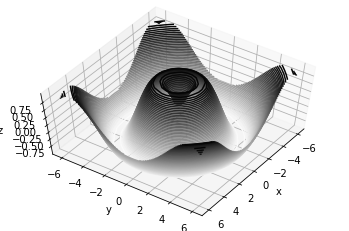

In [6]:
ax.view_init(60, 35)
fig

In [21]:
dataset = pd.read_csv('/content/drive/MyDrive/Tổng hợp sách/data vizualization/Datasets/Iris.csv')
feature_columns = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm','PetalWidthCm']
X = dataset[feature_columns].values
y = dataset['Species'].values
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)
dataset.head(4)

# dataset.groupby("Species").size()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa


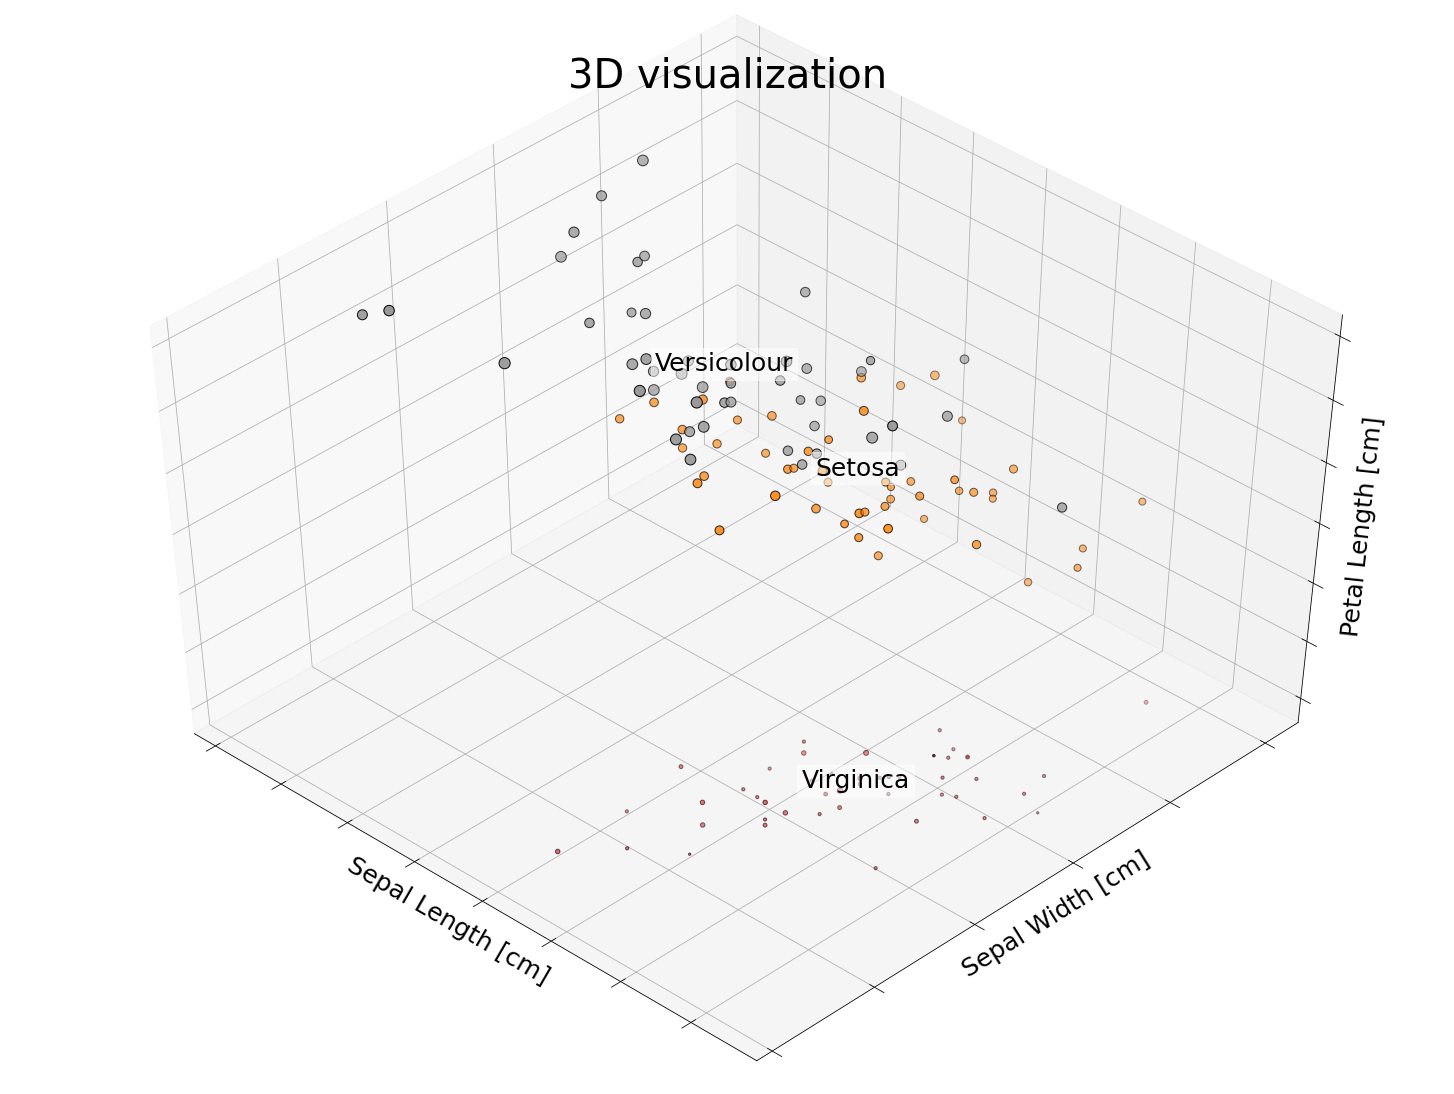

In [22]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(1, figsize=(20, 15))
ax = Axes3D(fig, elev=48, azim=134)
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y,
           cmap=plt.cm.Set1, edgecolor='k', s = X[:, 3]*50)

for name, label in [('Virginica', 0), ('Setosa', 1), ('Versicolour', 2)]:
    ax.text3D(X[y == label, 0].mean(),
              X[y == label, 1].mean(),
              X[y == label, 2].mean(), name,
              horizontalalignment='center',
              bbox=dict(alpha=.5, edgecolor='w', facecolor='w'),size=25)

ax.set_title("3D visualization", fontsize=40)
ax.set_xlabel("Sepal Length [cm]", fontsize=25)
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel("Sepal Width [cm]", fontsize=25)
ax.w_yaxis.set_ticklabels([])
ax.set_zlabel("Petal Length [cm]", fontsize=25)
ax.w_zaxis.set_ticklabels([])

plt.show()